# **Import Libraries and Load Data**

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report  
from sklearn.metrics import f1_score, classification_report, confusion_matrix


# Load the training and test datasets
train_data = pd.read_csv("/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_train.csv")
test_data = pd.read_csv("/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_test.csv")

#  few rows of the training data  
train_data.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam,ID
0,0.00,0.0,1.12,0.0,0.56,0.00,0.0,0.00,0.00,0.56,...,0.101,0.00,0.606,0.000,0.0,2.360,19,144,1,29
1,0.32,0.0,0.64,0.0,0.32,0.32,0.0,1.61,0.32,0.64,...,0.160,0.00,1.178,0.107,0.0,3.613,63,318,1,3792
2,0.00,0.0,0.00,0.0,0.34,0.00,0.0,0.34,0.00,1.70,...,0.055,0.11,0.000,0.000,0.0,1.421,8,91,0,1317
3,0.19,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.108,0.00,0.000,0.108,0.0,2.634,23,303,0,3309
4,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.746,0.00,0.000,0.000,0.0,1.687,4,27,0,3342


# **Data Exploration and Visualization**

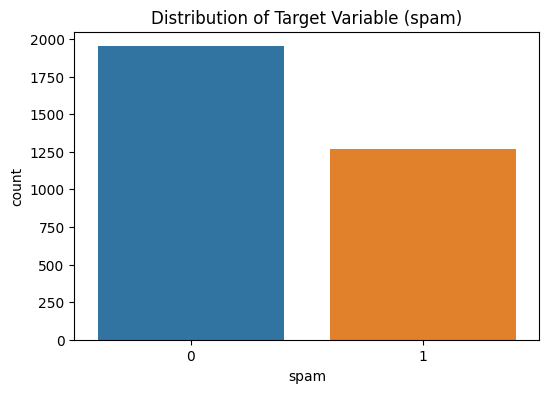

In [2]:
plt.figure(figsize=(6,4))
sns.countplot(x=train_data['spam'])
plt.title('Distribution of Target Variable (spam)')
plt.show()


# Data Preprocessing

In [3]:
X_train = train_data.drop(columns=['spam', 'ID'])
y_train = train_data['spam']

# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100)


# Model Training

In [4]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training split
rf_classifier.fit(X_train_split, y_train_split)


RandomForestClassifier(random_state=42)

# Feature Importance

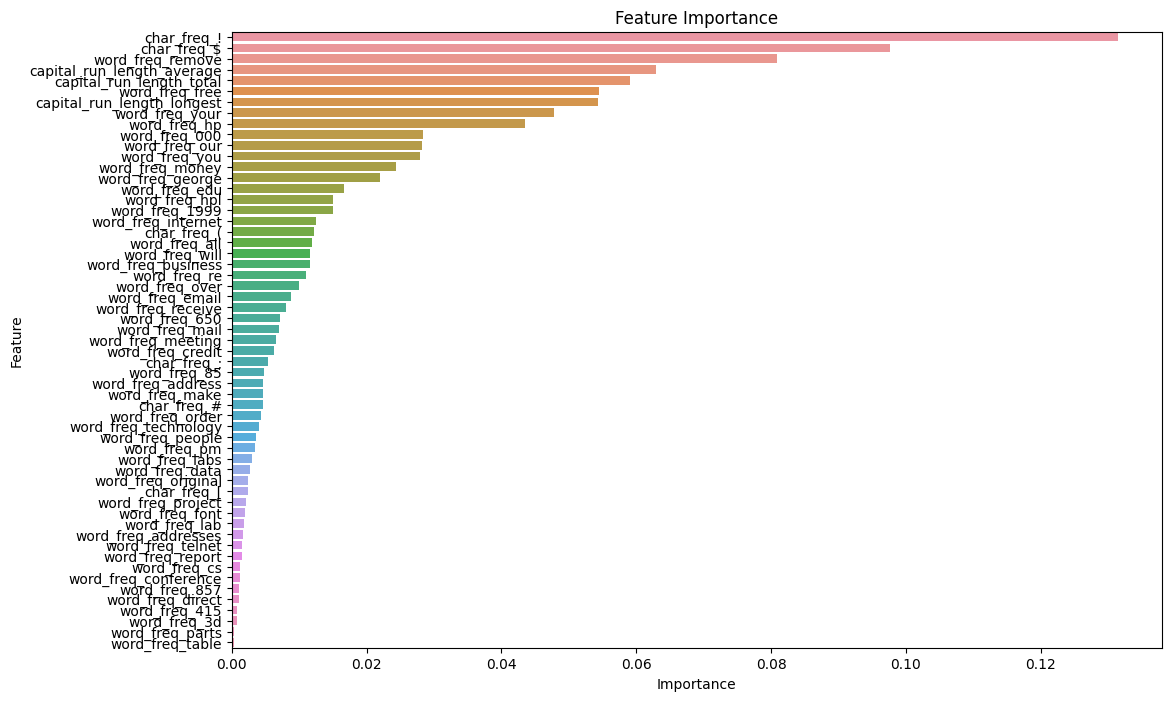

In [5]:
# Get feature importances from the Random Forest model
feature_importances = rf_classifier.feature_importances_
features = X_train.columns

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Model Evaluation

In [6]:
# Predict on the validation set
val_predictions = rf_classifier.predict(X_val)

# Evaluate the model on the validation set using F1 score
val_f1_score = f1_score(y_val, val_predictions, average='weighted')   
val_classification_report = classification_report(y_val, val_predictions)

print("Validation F1 Score:", val_f1_score)
print("Validation Classification Report:\n", val_classification_report)


Validation F1 Score: 0.9531958977846196
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       382
           1       0.97      0.92      0.94       262

    accuracy                           0.95       644
   macro avg       0.96      0.95      0.95       644
weighted avg       0.95      0.95      0.95       644



# Prediction on Test Data

In [7]:
# Predict on the test dataset
X_test = test_data.drop(columns=['ID'])
predictions = rf_classifier.predict(X_test)

# Create a submission DataFrame
submission_df = pd.DataFrame({'ID': test_data['ID'], 'spam': predictions})

# Save the submission file
submission_df.to_csv('submission.csv', index=False)

# Display the first few rows of the submission file
submission_df.head()


,ID,spam
0,1981,0
1,1940,0
2,4260,1
3,3200,1
4,3082,1
